# This notebook show how to do 
## 1 PCA
- PCA on  Fashion MNIST  dataset to do data compression.
- How to project data into new basis(principle components)
- Reconstruct data using only few principle components(Leaving principle component capturing less variation in data).

## 2  Fisher LDA(supervised dimensionality reduction)


In [0]:
%matplotlib inline

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler


In [225]:
from keras.datasets import fashion_mnist
((x_train, y_train), (x_test, y_test)) = fashion_mnist.load_data()
x_train.shape

(60000, 28, 28)

**train Data is of shape (60000, 28, 28). It contains 60000 images of shape 28X28.
Data is loaded in numpy  array object.**

In [0]:
matplotlib.rcParams['figure.figsize'] = (1, 1)
train_points_to_consider= 60000

In [227]:
X = x_train[0:train_points_to_consider,:]
Y = y_train[0:train_points_to_consider]
n_samples = X.shape[0]
print(n_samples)

60000


In [228]:
np.unique(Y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Generally if your features are measured in different units(cm. km, light year etc) then standardizing them is a good practice.
Otherwise features measured in bigger units will dominate the variance.
Also search when to standardise the feature for more detal explanation.

**In this example we are not using StandardScaler. Each feature value is pixel intensity. Hence unit is not an issue here. I just kept it here to make you aware of it. It is not the only way to standardize the data. To learn more read the sklearn documentation on standardizing data**

You can read more about this dataset here
https://github.com/zalandoresearch/fashion-mnist


images in dataset belongs to following categories.

### Labels
Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [0]:
#std_scale = StandardScaler().fit(X)
#X = std_scale.transform(X)

# Let's plot some images

# Let set the seed so than we can reproduce the results across multiple run of notebook

In [0]:
np.random.seed(1)

**Let's plot some random images from the dataset by creating some random indexes**

In [0]:
samples_to_plot = 10
indexes = np.random.randint(0, high=n_samples, size= [samples_to_plot])

In [232]:
print(indexes)

[33003 12172  5192 32511 50057 43723  7813 52047 21440 32912]


In [ ]:
for idx in indexes:
    plt.imshow(X[idx,:],cmap= 'gray' )
    plt.title('image = {}'.format(str(Y[idx])))
    plt.show()

# Let's vectorizing and centralize the data 

In [234]:
X1= X.reshape((X.shape[0], -1))
X1.shape

(60000, 784)

In [0]:
mu= np.mean(X1, axis=0)

In [237]:
X_c = X1 - np.mean(X1, axis=0)
print(X_c.shape)


(60000, 784)


We can directly build covariance matrix but it not numerically stable technique. As per our discussion in the class we will use svd trick for doing PCA(essentially computing eigen vector of the covariance matrix). 

You can read about svd in detail [here](http://www.cs.cornell.edu/courses/cs3220/2010sp/notes/svd.pdf) or read your linear algerba book for SVD.

In [0]:
# U, E, VT = svd(X)
U, E, VT = np.linalg.svd(X_c, full_matrices=False)

In [240]:
U.shape, E.shape,VT.shape

((60000, 784), (784,), (784, 784))

Hence column of V or row of VT are eigen vectors of $X_c^TX_c$

**Note that $X_c^TX_c$ captures unscaled covariance matrix.**

Diagonal matrix E contains the <font color = "red">square root </font> of eigen value of $X_c^TX_c$

# Q1(1 point) using E calculate  variance explained v(p) vs number of p principle components. Store v(p) in a variable named  relative_variance_capture.

**Note v(p) represents variance captures by first p principle components.**

Hint: numpy cumulative sum function can help.

In [ ]:
# Write code here
relative_variance_capture = ???


# Q2(.5 point) Plot the variance explained v(p) vs number of p principles capturing v(p). Use *num components* for x axis label and *cumulative explained variance* for y axis label.



In [1]:
# Write code here



# Q3 (1 point) Using variable *relative_variance_capture*, find the least number of principle components require to capture 96\%  of the variance in the data. Store the number of required principle components in  the variable reduce_dim.

Hint use numpy function np.where


In [0]:
# Write code here

reduced_dim = ???

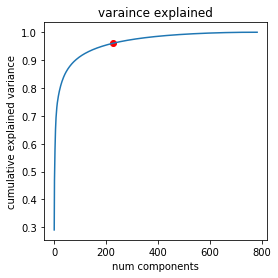

In [246]:
plt.figure(figsize=(8,8))

plt.plot(reduced_dim, relative_variance_capture[reduced_dim]/relative_variance_capture[-1], 'ro')
plt.plot(relative_variance_capture/relative_variance_capture[-1])
plt.title('variance explained')
plt.xlabel('num components')
plt.ylabel('cumulative explained variance')
plt.show()



# Let's reconstruct

Coefficient along principle components is given by
$$X_{proj} = X_{C_{N,d}} V_{d, p}$$

Here
- d = dimension of the data points(image)
- p = reduced_dim

Please convinced yourself with above projection equation.

In [0]:

X_proj= np.dot(X_c, VT.T[:, :reduced_dim])

In [248]:
print(X_proj.shape)

(60000, 225)


X_proj contains the coefficients(along different principle components) of the images along the rows of X_proj. As $p << d$ we have achieved compression of original images. You can use this reduced representation of images as part of your machine learning/data science pipe line(building classifier etc.)

In fact, we can reconstruct using $p$ principle components and see how well these compressed representation captures the original data content(visually). There are more objective way to measure reconstruction error like signal to noise ratio $PNSR$ but this is the subject of signal processing.


$$X_{reconstructed} = X_{proj_{N, p}} V^T_{p, d} $$

In [0]:
X_reconstructed = np.dot(X_proj,VT[:reduced_dim, :])

In [250]:
print(X_reconstructed.shape)

(60000, 784)


In [251]:
X_reconstructed += mu
X_reconstructed.shape

(60000, 784)

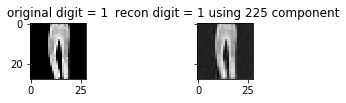

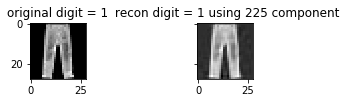

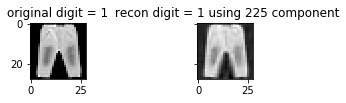

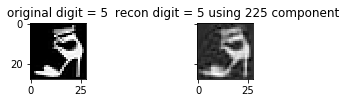

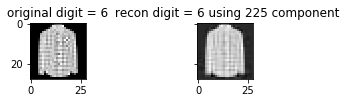

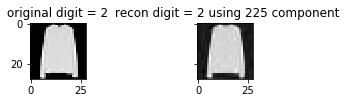

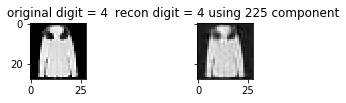

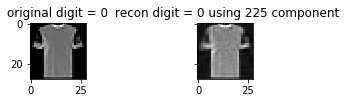

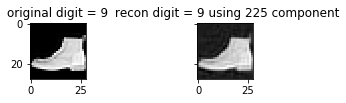

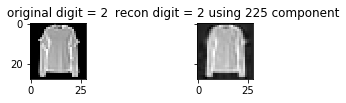

In [252]:
for idx in indexes:
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize= (4,4))
    ax1.imshow(np.reshape(X_noisy[idx,:], (28,28)),cmap= 'gray' )
    ax1.set_title('original image = {}'.format(str(Y[idx])))
    ax2.imshow(np.reshape(X_reconstructed[idx,:], (28,28)),cmap= 'gray' )
    ax2.set_title(' recon image = {} using {} component'.format(str(Y[idx]), reduced_dim))
    # Fine-tune figure; make subplots farther from each other.
    f.subplots_adjust(hspace=2.0, wspace = 2.0)
    
    plt.show()

# Let's visualize  first two component in project PCA space for all the data

In [253]:
Y.shape

(60000,)

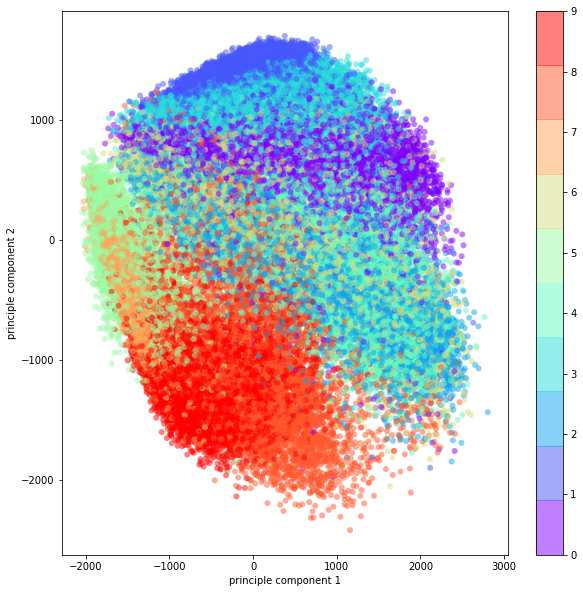

In [254]:
plt.figure(figsize=(10,10))
plt.scatter(X_proj[:, 0], X_proj[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('principle component 1')
plt.ylabel('principle component 2')
plt.colorbar();

# Let's use sklearn

# Q4(1 point) Using sklearn to do PCA and plot first two coefficients corresponding to the first two principle component.

Hint you plot should match with previous plot.



# LDA  Part





In [258]:
X1.shape

(60000, 784)

In [0]:
X = X1

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(solver = 'eigen')
lda_fit = lda.fit(X, Y)


In [ ]:
X_lda = lda_fit.transform(X)

# Let's visualize the compactness of each class cluster and separation between classes using  only two lda directions.

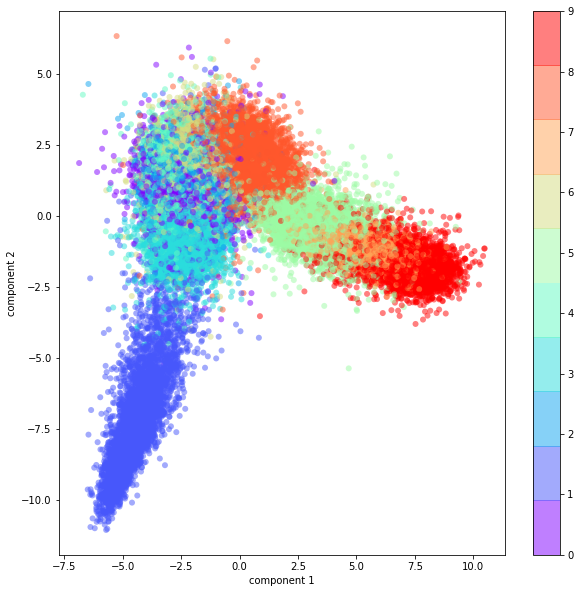

In [363]:
plt.figure(figsize=(10,10))
plt.scatter(X_lda[:, 0], X_lda[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [0]:
unique_class_label = np.unique(Y)

In [365]:
print(unique_class_label)
num_classes = len(unique_class_label)


[0 1 2 3 4 5 6 7 8 9]


# Multiclass LDA see section 8.6.3.2 in the book

Let say we have $C$ classes

- $n_k=$ number of sample in class k
- $n = \sum_{k=1}^C n_k$ total sample

class $k$ mean $\mu_k= \frac{\sum_{i:y_i= k}x_i}{n_i}$ and over all mean $\mu= \frac{\sum_{i} x_i}{n}$

Objective function is $$\frac{|V^T S_B V|}{|V^TS_W V|}$$

where

- Within class scatter matrix  $S_w = \sum_{k=1}^C S_k$ and $S_k=  \sum_{i:y_i=k}((x_i - \mu_i)(x_i -\mu_i)^T)$
i.e class k unscaled covariance

- Between class scatter matrix $Sb =  \sum_{k=i}^{k=C} n_k (\mu_i - \mu)(\mu_i -\mu)^T$

Note maximum rank of $Sb$ is $C-1$


# computation of Sb and S_w

# Q 5 (1 point) Complete the following block of code for S_i. S_i captures within class unscaled co variance for class i. Don't write a for loop. Use matrix operations on X_i_c to compute  the co-variance matrix.

In [406]:
#std_scale = StandardScaler().fit(X1)
#X1 = std_scale.transform(X1)
#X = X1
feature_dim = X.shape[1]
S_w = np.zeros((feature_dim, feature_dim))# Total withi class scatter
S_b = np.zeros((feature_dim, feature_dim))# Between calss scatter
m = np.mean(X, axis=0) # over all mean
for cls_idx in unique_class_label:
    X_i = X[Y==cls_idx]
    m_i= np.mean(X_i,axis = 0)
    print('{} example  if class {}'.format(X_i.shape[0], cls_idx))
    S_b = S_b + X_i.shape[0]*np.outer(m_i- m, m_i -m)
    S_i = np.zeros((feature_dim, feature_dim))
    X_i_c = X_i -m_i
    
    S_i = # Write code here
    
    assert S_i.shape == (feature_dim, feature_dim), "within class scatter size class {} not right".format(cls_idx)
    # Add to the over all withi class scatter S_w
    S_w = S_w + S_i
    

6000 example  if class 0
6000 example  if class 1
6000 example  if class 2
6000 example  if class 3
6000 example  if class 4
6000 example  if class 5
6000 example  if class 6
6000 example  if class 7
6000 example  if class 8
6000 example  if class 9


There are no more question in this notebook but please go through rest of the code.

In [413]:
np.all(np.linalg.eigvals(S_w)>0)

True

**Let's solve $S_b v = \lambda S_w v$ Generalized eigen value, vector problem**

In [0]:
from scipy import  linalg

In [0]:
eig_val, eig_vec = linalg.eigh(S_b, S_w)

In [416]:
np.linalg.norm(eig_vec[:,0])

0.0005640437409062079

In [417]:
np.allclose(S_w, S_w.T)

True

In [418]:
eig_val

array([-1.20494026e-13, -9.71041087e-14, -9.18410167e-14, -9.13996556e-14,
       -8.40601775e-14, -8.12776976e-14, -8.05879224e-14, -7.88433662e-14,
       -7.63283053e-14, -7.56021211e-14, -6.96850546e-14, -6.88717320e-14,
       -6.82154934e-14, -6.60031144e-14, -6.49426788e-14, -6.31207491e-14,
       -6.09113271e-14, -5.88938401e-14, -5.78655433e-14, -5.76551098e-14,
       -5.53033284e-14, -5.51668600e-14, -5.47850675e-14, -5.36264302e-14,
       -5.13544130e-14, -5.10375412e-14, -5.01410608e-14, -5.00134377e-14,
       -4.88418439e-14, -4.86690520e-14, -4.62976492e-14, -4.52829463e-14,
       -4.45350209e-14, -4.36458164e-14, -4.36130233e-14, -4.25326886e-14,
       -4.24173501e-14, -4.22392127e-14, -4.16323378e-14, -4.14353603e-14,
       -4.08094604e-14, -3.95641554e-14, -3.95082023e-14, -3.84176098e-14,
       -3.76279998e-14, -3.70378602e-14, -3.68430756e-14, -3.68083161e-14,
       -3.57132303e-14, -3.54219844e-14, -3.54113725e-14, -3.49017773e-14,
       -3.34662645e-14, -

In [0]:
evecs = eig_vec[:, np.argsort(eig_val)[::-1]]  # sort eigenvectors

In [420]:
evecs

array([[-2.31630038e-04, -2.43827691e-05,  2.19678889e-04, ...,
        -2.49116620e-05, -1.32053493e-04, -1.60064729e-04],
       [ 1.99867448e-04, -2.69897702e-06, -3.09786127e-04, ...,
        -2.81722303e-05,  1.52060868e-04,  1.44534649e-04],
       [-9.62791646e-05,  2.25158387e-05,  2.43119006e-04, ...,
        -1.17792148e-05, -5.04381372e-05, -1.74686224e-05],
       ...,
       [ 3.92960905e-09,  2.15925835e-06,  5.67095989e-06, ...,
         7.19321441e-06, -5.46610982e-07,  6.02508818e-06],
       [ 1.51999295e-06, -3.85998677e-06,  2.69248164e-06, ...,
        -6.47489760e-06,  6.51395651e-06, -7.20120843e-07],
       [ 4.60282862e-06,  4.69233028e-06,  3.31860528e-06, ...,
         3.92571906e-05, -2.56529981e-05,  2.18258214e-06]])

**See exactly only nine eigen values are non zero. other are almost zero**
Let's take coresponding eigen vector and build our LDA projection matrix

In [0]:
W = evecs[:, 0:num_classes -1]

In [422]:
W.shape

(784, 9)

# Eigen vectors in not unit length. Let's normalize it

In [0]:
nn = np.linalg.norm(W, axis=0)

In [424]:
nn

array([0.00035333, 0.0001454 , 0.00055046, 0.00017011, 0.00030199,
       0.00034472, 0.00028444, 0.00039754, 0.00142673])

In [0]:
W /= nn.T

In [426]:
np.linalg.norm(W, ord= 2, axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [427]:
print(W.shape)
print(X.shape)

(784, 9)
(60000, 784)


Projection direction are stacked along row. Let Project the data in these nine direction

In [428]:
projected_data = np.dot(X, W)
print(projected_data.shape)

(60000, 9)


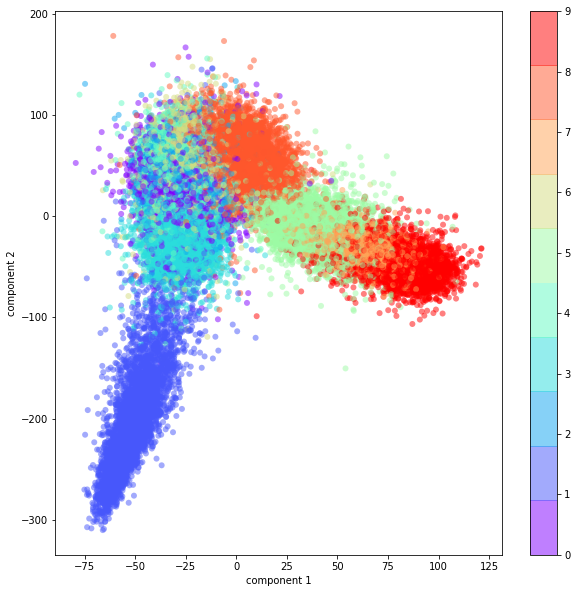

In [429]:
plt.figure(figsize=(10,10))
plt.scatter(projected_data[:, 0], projected_data[:, 1],
            c=Y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();